In [127]:
import os
os.getcwd()
os.chdir('C:/Users/payal/OneDrive/Documents/595')
from gettext import install
import pandas_datareader.data as web 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime as dt
from scipy.optimize import minimize 
from cvxpy import * 
import cvxopt as opt
from cvxopt import blas, solvers
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)

# Building a Robo Advisor

### Submitted by: Abhinaya Vaithianathan, Bhavi Kavedia, Khyati Joshi, Payal Motwani

Robo-advisors automate investment management by using computer algorithms to build a portfolio and manage assets based on one's goals and risk tolerance.

## Whitepaper Summary

After reading both the articles and their strategies we think that betterment has a few limitations as compared to the Wealthfront. Betterment definitely has very good and efficient portfolio strategies, but it can be still much better if we look at Wealthfront’s article and the strategies, the follow-up strategies of that one goes a long way to assist the investors even after the portfolio has been made and applied in the market while betterment lacks that part and can be a limitation. 

 Also, Betterment’s focus on handling small accounts is almost null while Wealthfront focuses both on big as well as small accounts, which is great to serve all types of investors. Along with this Betterment and Wealthfront have quite diverse ways of finding out the risk tolerance of their client. Wealthfront has 40 portfolios, taxable and retirement accounts combined, Betterment has 101 individualized portfolios, and more asset classes compared to betterment, excluded Real Estate, and Commodities. e Betterment has portfolio optimization methods that enable the Betterment Portfolio Strategy to contain 101 different portfolios and a way to utilize the Capital Asset Pricing Model (CAPM) along with a utility function which allows them to optimize for the portfolio with a higher return for the risk that the investor is willing to accept along with asking them questions regarding their risk tolerance. Rather than asking the typical 25 questions asked by financial advisors to identify an individual’s risk tolerance, Wealthfront combed behavioral economics research to simplify their risk identification process to only a few questions. They ask subjective risk questions to determine both the level of risk an individual is willing to take and the consistency among their answers along with regular follow-up on their portfolios along with market changes, which we think is effective. So, if Betterment can overcome these limitations as mentioned above by us along with the comparisons in both models, we think there is a great scope for further improving their efficiency.


## Asset Selection
A portfolio is a blend of assets in proportion that minimizes risk and maximizes returns. For this we will be considering four different classes, US stocks, Treasury bonds, Corporate bonds and Real estate ETFs. 

### US Stocks   
A stock is a type of security that denotes the holder's ownership stake in the issuing company and is typically traded on stock markets. US stocks are the cornerstone of the portfolios of many individual investors and are mostly bought and sold on stock exchanges. Equities are a core part of portfolio, though they are higly volatile but provide inflation protected returns for alpha in the portfolio. For Us stocks, we seek to find an ETF to match the performance of the S&P 500 Index.
Here is the table of three best ETFs



In [3]:
data =[['SPY','SPDR SP 500 ETF Trust', 364371000,0.9, 1.73,-18.01,12.64,12.24,-14.20], 
       ['IVV','iShares Core SP 500 ETF',291209000,0.3,1.72,-18.01,12.70,12.29,-14.19],
      ['VOO','Vanguard SP 500 ETF',262430000,0.03,1.77,-18.03,12.7,12.28,-14.22]]
import pandas as pd
us_stocks = pd.DataFrame(data, columns=['Ticker','Name', 'AUM','Exp Ratio','Div yield','YTD rtn','10Y','5Y','1Y'])
us_stocks

,Ticker,Name,AUM,Exp Ratio,Div yield,YTD rtn,10Y,5Y,1Y
0,SPY,SPDR SP 500 ETF Trust,364371000,0.90,1.73,-18.01,12.64,12.24,-14.20
1,IVV,iShares Core SP 500 ETF,291209000,0.30,1.72,-18.01,12.70,12.29,-14.19
2,VOO,Vanguard SP 500 ETF,262430000,0.03,1.77,-18.03,12.70,12.28,-14.22


For the selection criteria, certain leveraged and actively managed funds were ruled out because they frequently charge higher cost ratios without providing superior returns or higher dividend yields. The focus was on those funds that offered a combination of low expense ratios and performance that have exceeded the returns of the S&P 500 Index. 
Expense ratio is the most key factor since any expenses are the direct deduction from the return of the ETF which has compounding effect over the year. It is always a particularly worthwhile investment choice to have ETFs with higher funds. Liquidity is another factor to be considered funds with higher average trading volumes are more liquid and vice versa for funds with lower trading volumes. 
Tracking error tracks the fluctation between assets returns and benchmark index's return. For US stocks we have consider S&P 500 index. and computed tracking error as below

In [23]:

def download_etf(symbol,source,start_date='2010-01-01',end_date='2022-10-01'):
    '''
    symbol: "SPX"  
    source: "stooq"   
    start_date: ... 
    end_date: ... 

    return: data (pd.DataFrame)
    '''
    data = web.DataReader(symbol,source,start=start_date,end=end_date) 
    data = data.sort_index() 

    return data 

def download_etfs(symbols,source,start_date='2010-01-01',end_date='2022-10-01'):  
    '''
    symbols is a list of ETF symbols

    symbols = ['SPY','IVV','VOO'] 
    '''
    
    dfs = [] # empty list of pandas dataframes 

    for sym in symbols: 
        df = download_etf(sym,source,start_date=start_date,end_date=end_date)
        tmpdf = df['Close']
        dfs.append(tmpdf)  

    df = pd.concat(dfs,axis=1) 
    df.columns = symbols 

    return df 

def annual_returns(symbol):
    data = download_etf(symbol,"stooq", start_date, end_date)
    

def tracking_error(index,etf): 
    '''
    index, etf: pandas dataframes of returns with dates that are aligned 
    '''

    n = len(index) 

    tracking_error = np.sqrt(sum((index - etf)**2)/(n-1))

    return tracking_error 




if __name__ == "__main__": 
    symbols = ["^SPX","SPY","IVV","VOO"]  

    source = 'stooq' 
    start_date = '2010-01-01' 
    end_date = '2022-10-01'
    
    data = download_etfs(symbols,source,start_date=start_date,end_date=end_date)  

    rtndf = data.pct_change().dropna()

    # 
    spxspy_te = tracking_error(rtndf['^SPX'],rtndf['SPY']) 
    #print("SPX - SPY tracking error is : {}".format(spxspy_te))
    spxivv_te = tracking_error(rtndf['^SPX'],rtndf['IVV']) 
    #print("SPX - IVV tracking error is : {}".format(spxivv_te))
    spxvoo_te = tracking_error(rtndf['^SPX'],rtndf['VOO']) 
    #print("SPX - VOO tracking error is : {}".format(spxvoo_te))


SPX - SPY tracking error is : 0.0007585660656355252
SPX - IVV tracking error is : 0.0007022100417493997
SPX - VOO tracking error is : 0.000617981182264078


In [25]:
stats = pd.DataFrame()
stats['Annualized Returns(%)'] = rtndf.mean() * 252
stats['Annualized Volatility(%)'] = rtndf.std() * np.sqrt(252)
stats['Sharpe Ratio'] = stats['Annualized Returns(%)'] /stats['Annualized Volatility(%)']
stats['Tracking error'] = [0,spxspy_te,spxivv_te,spxvoo_te]
stats['Expense ratio'] = [0,0.9,0.03,0.03]
stats

,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio,Tracking error,Expense ratio
^SPX,0.111992,0.174958,0.640107,0.000000,0.00
SPY,0.129180,0.172908,0.747105,0.000759,0.90
IVV,0.129736,0.174712,0.742571,0.000702,0.03
VOO,0.129789,0.174434,0.744060,0.000618,0.03


VOO- Vanguard S&P 500 has lowest tracking error, expense ratio and comparatively better sharpe ratio, therefore we selected VOO for US stocks representative in our portfolio

### Treasury Bonds
Treasuries are debt obligations issued and backed by the full faith and credit of the US government. Treasury bonds ETFs primarily invest in these debt obligations issued by US government. Treasury bonds tend to give cushion against high-risk investments, they add as risk free investment portion of the portfolio.  For the analysis perspective, we decided to focus on ETFs that invest in bonds with maturity of 10-20 years.


In [29]:
data = [['SPTL','SPDR Portfolio Long Term Treasury ETF',0.06,'4.7 Bn','Fairly diversified – 77 holdings',16.09,4.33,-1.67],
        ['VGLT','Vanguard Long-Term Treasury ETF',0.04,'7.1 Bn', 'Fairly diversified – 70 holdings',16.3,4,-1.67],
        ['SCHQ','Schwab Long-Term U.S. Treasury ETF',0.03,'121 Mn','Fairly diversified – 72 holdings',16.3,4,-1.67],
        ['TLT','Ishares 20+ Year Treasury Bond',0.15,'24 Bn', '35 holdings',17.11,4.38,-1.88]]

tbond = pd.DataFrame(data, columns=['Ticker','Name', 'Exp Ratio', 'AUM','Diversification','Avg duration','YTM',
                                    ' Avg 5Y rtn'])
tbond


,Ticker,Name,Exp Ratio,AUM,Diversification,Avg duration,YTM,Avg 5Y rtn
0,SPTL,SPDR Portfolio Long Term Treasury ETF,0.06,4.7 Bn,Fairly diversified – 77 holdings,16.09,4.33,-1.67
1,VGLT,Vanguard Long-Term Treasury ETF,0.04,7.1 Bn,Fairly diversified – 70 holdings,16.30,4.00,-1.67
2,SCHQ,Schwab Long-Term U.S. Treasury ETF,0.03,121 Mn,Fairly diversified – 72 holdings,16.30,4.00,-1.67
3,TLT,Ishares 20+ Year Treasury Bond,0.15,24 Bn,35 holdings,17.11,4.38,-1.88


In [34]:
t_sym = ["SPTL","VGLT","SCHQ","TLT"]
tbonds = download_etfs(t_sym, "stooq","2011-01-01","2021-12-31")
tbond_rtn = tbonds.pct_change().dropna()
tbond_stats = pd.DataFrame()
tbond_stats['Annualized Returns(%)'] = tbond_rtn.mean() * 252
tbond_stats['Annualized Volatility(%)'] = tbond_rtn.std() * np.sqrt(252)
tbond_stats['Sharpe Ratio'] = tbond_stats['Annualized Returns(%)'] /tbond_stats['Annualized Volatility(%)']
tbond_stats['Expense ratio'] = [0.06,0.04,0.03,0.15]
tbond_stats


,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio,Expense ratio
SPTL,0.043288,0.166634,0.259779,0.06
VGLT,0.044031,0.162879,0.270332,0.04
SCHQ,0.043415,0.165266,0.262700,0.03
TLT,0.048850,0.176764,0.276357,0.15


TLT and VGLT both have highest sharpe ratio, expense ratio of VGLT is much lesser than TLT. We select TLT for treasury bonds.

### Corporate Bonds
Corporate bond portfolios focus on investment-grade bonds issued by businesses in US dollars, which often carry a higher level of credit risk than bonds backed by the government or an agency. Corporate bond funds' underlying assets are various types of debt, such as outstanding corporate debt or commercial debt like mortgages or private school loans. Corporate bonds are better than treasury bonds in terms of return with almost some risk exposure.


In [35]:
c_sym = ["VCSH","VCIT","LQD","HYG","VCLT"]
cbonds = download_etfs(c_sym, "stooq","2011-01-01","2021-12-31")
cbond_rtn = cbonds.pct_change().dropna()
cbond_stats = pd.DataFrame()
cbond_stats['Annualized Returns(%)'] = cbond_rtn.mean() * 252
cbond_stats['Annualized Volatility(%)'] = cbond_rtn.std() * np.sqrt(252)
cbond_stats['Sharpe Ratio'] = cbond_stats['Annualized Returns(%)'] /cbond_stats['Annualized Volatility(%)']
cbond_stats['Expense ratio'] = [0.04,0.04,0.14,0.48,0.04]
cbond_stats

,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio,Expense ratio
VCSH,0.025942,0.028548,0.908701,0.04
VCIT,0.047991,0.052084,0.921412,0.04
LQD,0.051067,0.072006,0.709205,0.14
HYG,0.050131,0.083795,0.598256,0.48
VCLT,0.073961,0.111611,0.662673,0.04


VCIT- Vanguard Intermediate-Term Corporate Bond Index Fund has the highest sharpe ratio with lowest expense ratio. Hence we chose VCIT for corporate bond etfs

### Real Estate ETFs REITS
Real estate ETFs have broad exposure to the real estate market. These ETFs invest in REITs, real estate service firms and real estate development companies. They pay out their rents as dividends to investors. REITs provide income, inflation protection, and diversification benefits.With 52 ETFs traded on the U.S. markets, Real Estate ETFs have total assets under management of $49.18B. The average expense ratio is 0.49%



In [44]:
r_sym = ["REZ", "ICF","VNQ","IYR"]
rbonds = download_etfs(r_sym, "stooq","2011-01-01","2021-12-31")
rbond_rtn = rbonds.pct_change().dropna()
rbond_stats = pd.DataFrame()
rbond_stats['Annualized Returns(%)'] = rbond_rtn.mean() * 252
rbond_stats['Annualized Volatility(%)'] = rbond_rtn.std() * np.sqrt(252)
rbond_stats['Sharpe Ratio'] = rbond_stats['Annualized Returns(%)'] /rbond_stats['Annualized Volatility(%)']
rbond_stats['Expense ratio'] = [0.48,0.32,0.12,0.39]
rbond_stats

,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio,Expense ratio
REZ,0.138592,0.208798,0.663763,0.48
ICF,0.126167,0.202485,0.623093,0.32
VNQ,0.125532,0.200747,0.625324,0.12
IYR,0.119730,0.194341,0.616082,0.39


We see that REZ's sharpe ratio is better than VNQ, but expenses ratio of VNQ is the lowest and volaitility is almost same. REITs add a portion of inflation edge along with the risk, hence we decided to take REZ in portfolio considering best sharpe ratio

## Asset Allocation

In [100]:
''' downloading data and forming dataframe of all four chosen ETFs'''
symbols = ["VOO","TLT","VCIT","REZ"]
asset_data = download_etfs(symbols, "stooq","2011-01-01","2021-10-31")

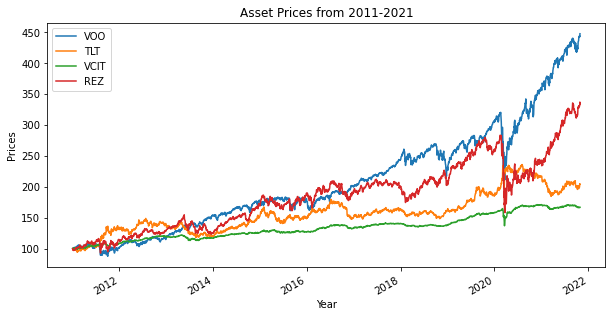

In [101]:

(asset_data / asset_data.iloc[0] * 100).plot(figsize=(10, 5))
plt.title('Asset Prices from 2011-2021')
plt.xlabel('Year')
plt.ylabel('Prices')
plt.show()


In [109]:
'''Calculating daily asset returns'''
rtndf = asset_data.pct_change(1).dropna()

In [110]:
"""MC simulations to visualize risk return of our selected ETFS"""
def portfolio_returns(weights):
    return (np.sum(rtndf.mean() * weights)) * 252



def portfolio_sd(weights):
    return np.sqrt(np.transpose(weights) @ (rtndf.cov() * 252) @ weights)



list_portfolio_returns = []
list_portfolio_sd = []
# For loop to simulate 1000 random weight vectors (numpy array objects)
for p in range(5000):
  # Return random floats in the half-open interval [0.0, 1.0)
    weights = np.random.random(size = 4) 
    weights /= np.sum(weights) 
    list_portfolio_returns.append(portfolio_returns(weights))
    list_portfolio_sd.append(portfolio_sd(weights))
  # Convert list to numpy arrays
    port_returns = np.array(object = list_portfolio_returns)
    port_sd = np.array(object = list_portfolio_sd)

Text(0, 0.5, 'Expected Portfolio  Return')

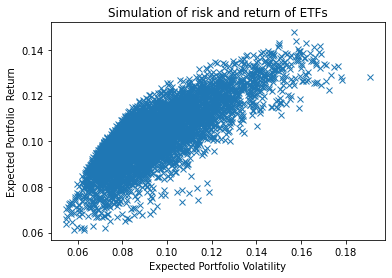

In [111]:
## Visualzing the MC simulation

plt.figure()
plt.plot(port_sd,port_returns,'x')
plt.title("Simulation of risk and return of ETFs")
plt.xlabel('Expected Portfolio Volatility')
plt.ylabel('Expected Portfolio  Return')

In [112]:
## Maximum Sharpe ratio Portfolio
def sharpe_fun(weights):
    return - (portfolio_returns(weights) / portfolio_sd(weights))

constraint = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bounds = tuple((0, 1) for w in weights)

equal_weights = np.array([1 / 4] * 4)

max_sr_port = minimize(fun = sharpe_fun, x0 = equal_weights, method = 'SLSQP',
                              bounds = bounds, constraints = constraint)





##Weights for max sharpe ratio portfolio
sr_wgts = max_sr_port["x"]
print(sr_wgts)
## MAximum sharpe ratio portfolio 
## Expected return and volatility of Maximum sharpe ratio portfolio
max_sr_rtn = portfolio_returns(max_sr_port["x"])
print("Return of maximum sharpe ratio portfolio is: {}".format(max_sr_rtn*100))
max_sr_sd = portfolio_sd(max_sr_port["x"])
print("Volaitlity of maximum sharpe ratio portfolio is: {}".format(max_sr_sd*100))


[0.3756042  0.31993886 0.30445694 0.        ]
Return of maximum sharpe ratio portfolio is: 9.685796104551999
Volaitlity of maximum sharpe ratio portfolio is: 6.944696909804591


Maximum sharpe ratio portfolio is the portfolio that gives highest risk adjusted returns. Four our portfolio, max sharpe ratio portfolio allocates 38% weight to Us stocks, 32% to treausry bonds and 30% to corporate bonds, zero allocation to real estate etfs.

In [113]:
## Minimum Variance Portfolio
min_var = minimize(fun = portfolio_sd,  x0 = equal_weights, method = 'SLSQP',
                       bounds = bounds, constraints = constraint)

##Weights for minimum variance portfolio
mv_wgts = min_var["x"]
print(mv_wgts)
## MAximum sharpe ratio portfolio 
## Expected return and volatility of Maximum sharpe ratio portfolio
mv_rtn = portfolio_returns(min_var["x"])
print("Return of minimum variance portfolio is: {}".format(mv_rtn*100))
mv_sd = portfolio_sd(min_var["x"])
print("Volatiltiy of minimum variance portfolio is: {}".format(mv_sd*100))

[0.06871426 0.         0.93128574 0.        ]
Return of minimum variance portfolio is: 5.59338042586884
Volatiltiy of minimum variance portfolio is: 5.082515605096707


Minimum variance portfolio is the best return portfolio with minimum risk. Our minimum variance portfolio will be achieved when we allocate 7% to stocks and 93% to corporate bond etfs

In [114]:
## Efficent Frontier
constraints = ({'type': 'eq', 'fun': lambda x: portfolio_returns(x) - target}, 
               {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple( (0, 1) for w in weights)
# Initialize an array of target returns
target = np.linspace(start = 0.01, stop = 0.15,num = 100)
obj_sd = []
for target in target:
    min_result_object = minimize(fun = portfolio_sd, x0 = equal_weights, method = 'SLSQP',
                                   bounds = bounds, constraints = constraints)
    obj_sd.append(min_result_object['fun'])
    

obj_sd = np.array(obj_sd)

target = np.linspace(start = 0.01, stop = 0.15,num = 100)


ef = pd.DataFrame({'x':target, 'y':obj_sd})

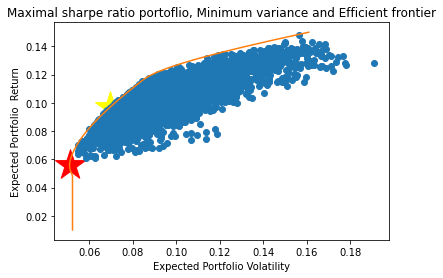

In [118]:
plt.figure()
plt.plot(port_sd,port_returns,'o')
plt.title("Maximal sharpe ratio portoflio, Minimum variance and Efficient frontier")
plt.xlabel('Expected Portfolio Volatility')
plt.ylabel('Expected Portfolio  Return')
plt.scatter(max_sr_sd,max_sr_rtn,color="yellow", marker = "*", s=1000)
plt.scatter(mv_sd,mv_rtn,color="red", marker = "*", s=1000)
plt.plot(ef["y"],ef["x"])

Efficent frontier portfolios The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. In the plot above all portfolios on or above red line are efficient frontier portfolios. Yellow star represents maximum sharpe ratio portfolio and red is minimum variance portfolio

In [124]:
def mark_obj(weights,lam):
    return  portfolio_sd(weights) - lam * (portfolio_returns(weights))

constraint = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bounds = tuple((0, 1) for w in weights)

equal_weights = np.array([1 / 4] * 4)

lamgrd = np.linspace(start = 0,stop = 5, num = 100)
obj_sd1 = []
mark_weights = []
for lam in lamgrd:
    optfun = lambda x: mark_obj(x,lam)
    mark = minimize(fun = optfun, x0 = equal_weights, method = 'SLSQP',
                                   bounds = bounds, constraints = constraint)
    obj_sd1.append(mark['fun'])
    mark_weights.append((mark["x"]))
    
    
    
obj_sd1 = np.array(obj_sd1)
lamgrd = np.linspace(start = 0.1, stop = 1,num = 100)

min_mark = pd.DataFrame({'lambda':lamgrd,  "weights": mark_weights})

In [126]:

"""Considering 100 risk aversion parameters from 0.1 to 1, 0.1 being the lowest and 1 being the highest"""
'''Portfolio weights for most risk averse investor are '''
print(min_mark.loc[min_mark['lambda']==0.1])

print(min_mark.loc[min_mark['lambda']==1,'weights'])

print(min_mark.loc[min_mark['lambda']==0.5,'weights'])


   lambda                                            weights
0   0.100  [0.06871426231426309, 0.0, 0.9312857376857369,...
99    [0.9999999999999993, 5.342948306008566e-16, 2....
Name: weights, dtype: object
44    [0.69408218893234, 0.30591781106766014, 0.0, 1...
Name: weights, dtype: object


We calculated 100 portolfios for different risk levels with 0.1 being lowest and 1 being highest, basis this we calculated weights for each asset in portfolio. As we see one who wants to take minimum risk should allocate 7% to Us stocks and 93% weights to real estate etfs, these results as we see are skewed because we are currently in real estate boom market. One who wants to take maximum risk should allocate 100% assets to US stocks etfs.
Any individual who wants to take 50% risk of capital, should allocate 70% of capital to Us stcoks and 30% to Treasury bonds and so on.

## Portfolio Rebalancing
The most common reason to rebalance a portfolio is diversification. A portfolio created using MPT- based techniques will not stay optimized over time. The compensation of any investment portfolio will naturally drift as capital markets move and certain holdings outperform others. This typically results in two adverse outcomes: (1) Portfolio risk increases as the equity portion of portfolio grows beyond its original allocation, and (2) allocations become sub-optimally mixed. To maintain the intended risk level and asset allocations, a portfolio must be periodically rebalanced back to its original targets.    When rebalancing a portfolio, you may opt to add a combination of index and thematic investments to your stock allocation. By employing one or both strategies, the key is to keep fees low and remain diversified.    

   

When to Rebalance a portfolio:    

There is not a hard-and-fast rule on when to rebalance your portfolio. But many investors make it a habit to revisit their investment allocations annually, quarterly, or even monthly. Others decide to make changes when an asset allocation exceeds a certain threshold such as 5 percent.    

   

Robo-advisors for rebalancing the portfolio:    

Robo advisors offer an automatic rebalancing feature. Robo-advisors rebalances a portfolio in two different ways. Target date retirement funds automatically rebalance portfolios based on your age. Robo-advisors automatically rebalance portfolios based on individual client requirements.  Although Robo-advisors provide investment advice using sophisticated algorithms, it has some disadvantages one of it is automatic rebalancing is not perfect. Asset allocation isn’t designed to be fixed; it’s intended to shift and evolve along with an investor’s risk tolerance and time horizon. Robo advisors attempt to make managing asset allocation easier through automatic rebalancing, but there are problems with that strategy. The first is the potential for returns to underwhelm. “Hyper, periodic rebalancing can force portfolios to sell winners into growing markets and not realize the holding periods required for investment participation,” says Adam Holt, CEO and founder of Philadelphia-based Asset-Map. There’s also a cost component to consider, changing the balance automatically can get expensive if it triggers transaction fees or taxable events. Also, automatic rebalancing models have yet to be tested against a large market correction. The possibility of a correction aside, automatic rebalancing can make it harder to create a customized portfolio. Automatic rebalancing may not produce the best outcomes for clients because their other assets, investments and overall financial goals are not taken into consideration. That could be a serious issue for someone whose assets aren’t centralized at a single robo advisor platform.  An automatic rebalance from a robo advisor could make you overweighted in a certain sector if it doesn’t consider all your assets   

  

Tax- Loss harvesting:   

There are diversified ways in Robo- advisor can be used to increase returns like better diversification, better asset choosing for investors with different risk tolerances. Tax loss harvesting is implemented to maximize after tax-returns.   

In common, once an investor sells a capital asset for a price that’s higher than the purchase price, the investor realizes capital gains and needs to pay tax for the capital gains. As a result, how much tax is paid effects the returns directly.   

Tax Loss harvesting is a strategy of selling securities at a loss to offset a capital gains tax liability. It is an efficient way to make your investment portfolio work harder not just in generating investment returns, but by also in generating tax savings.   

Tax Loss harvesting is primarily a tax deferral strategy, and its benefit depends entirely on individual circumstances, through which you can defer tax liabilities, not avoid them. So it has very little value if applied over a short investment horizon (i.e less than two years), but can be extremely valuable if executed over a long period of time. Most of all, it combines the need to respect the asset allocation constraints at any point in time with the restrictions of the tax code (i.e. wash sale rules).   

   

 Wash Sale Rule:   

Wash Sale Rule is at the core of any TLH Strategy. It disallows a loss from selling a security if a substantially identical security is purchased 30 days after or before the sale. Substantially identical security means two securities are too similar that the IRS cannot distinguish between them.   

   

Switch Back Strategy:  	     

Since Robo-Advisor cannot freely dispose of declined losses, the switch back strategy systematically replaces declined assets with correlated ones, that is assets which are not substantially identical for the tax code but whose returns are highly correlated to the original ones from a portfolio management perspective. That could be the case for ETFs which are in the same category but formally track different index.  In Robo-Advisor, the switch back strategy shares the same goal: maximizing a portfolio after-tax return while minimizing the negative impact of wash sales.  This strategy scans a portfolio at the end of very year during the first three years to realize losses. It can systematically sell ETFs which experienced a loss then use highly correlated ETFs to replace them. So, the losses are harvested while the optimal asset allocation and expected returns are maintained. And the harvested losses can be carried over to subsequent years to be deducted against capital gains. 

## Extensions
To develop our own Robo-advisor naturally, we will start by figuring out who our ideal client is, basically who will be the end user of the advisor. What are their requirements and how will your robo-advisor meet them? While learning a lot about our target demo and choosing whether our solution will be b2c, b2b, or a hybrid of both, the discovery phase also entails determining ROI objectives and making assumptions regarding technology. 

Before building my own Robo-advisor, we would consider a few things listed below  

Determine the risk profile.  

Choose an ETF portfolio on the web  

Set up an automatic investment plan  

Rebalance the portfolio   

 

The following step is typically to begin developing a quick prototype and fleshing out the software's UX and UI. However, we will first establish a proof of concept before you can create a robo adviser. Because the effectiveness of the machine learning algorithms determines how everything works. 

Almost all investors respect certain broad qualities in a robo-advisor, including simple account creation, effective goal planning, account services, portfolio management, security features, responsive customer care, thorough education, and affordable fees. We discovered thorough goal planning tools to be one of the most crucial components of a robo-advisor, even though cost is frequently the focus. The finest robo-advisors provide us the option to simulate your goal setting, sync external accounts for a fuller financial picture, and push us to take steps that will increase your odds of achievement. Beyond that, financial circumstances of individuals will determine which robo-advisor is ideal for them. 

The Robo adviser will increase the effectiveness of our distribution whether we are selling exchange-traded funds (ETFs), mutual funds, or single lines of private equity or bonds. We wouldn't use the Robo questionnaire to ask questions; instead, give investors some straightforward advise in the form of text or videos to help them understand. Insights from the audience may be measured rapidly to see where the process fell short. Not more than 30 questions will be asked. Simple guidance in the form of writing or videos could help investors grasp our question, as we put it. Insights from the audience may be measured rapidly to see where the process fell short. 

Let us analyze some steps and our ideas on building a Robo-advisor  

Data Collection  

Calculate the capital weighted equilibrium excess return  

Predict investors subjective views by ARIMA model  

Combine the views from ARIMA model and Research Affiliate  

Use Black-Litterman model to calculate the combined expected return and covariance matrix  

Use mean-variance optimization to calculate optimal weights  

Do the rebalance based on strategy we discussed before  

Generate the portfolio back-testing result and perform analysis  

  

Black-Litterman Model:  

The Black-Litterman (BL) Model is an analytical tool used by portfolio managers to optimize asset allocation within an investor’s risk tolerance and market views. The BL model starts from a neutral position using modern portfolio theory (MPT), and then takes additional input from investors' views to determine how the ultimate asset allocation should deviate from the initial portfolio weights. It then undergoes a process of mean-variance optimization (MVO) to maximize expected return given one's objective risk tolerance. 

ARIMA Model:   

ARIMA stands for Autoregressive Integrated moving average. A statistical model is autoregressive if it predicts future values based on past values. ARIMA makes use of lagged moving averages to smooth time series data. Autoregressive models implicitly assume that the future will resemble the past. Therefore, they can prove inaccurate under certain market conditions, such as financial crises or periods of rapid technological change. An ARIMA model is usually states as ARIMA (p, d, q) where p represents the order of the autoregressive components, d stands for the number of differencing times, and q stands for the highest order of the moving average term.